In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cardio_train.csv")

In [3]:
X=data.iloc[:,1:-1].to_numpy()
Y=data.iloc[:,-1:].to_numpy().squeeze()

# Before Remove Outlier

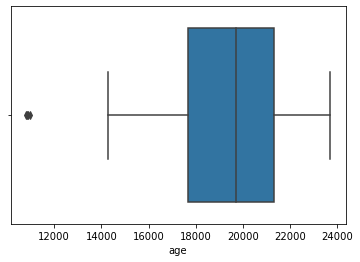

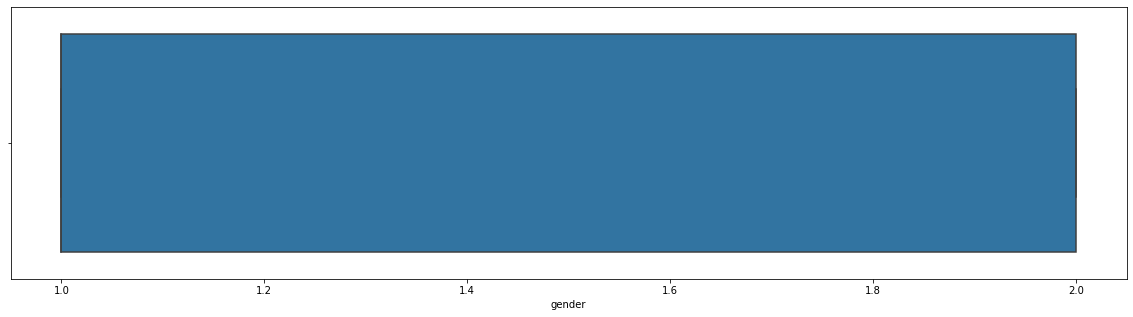

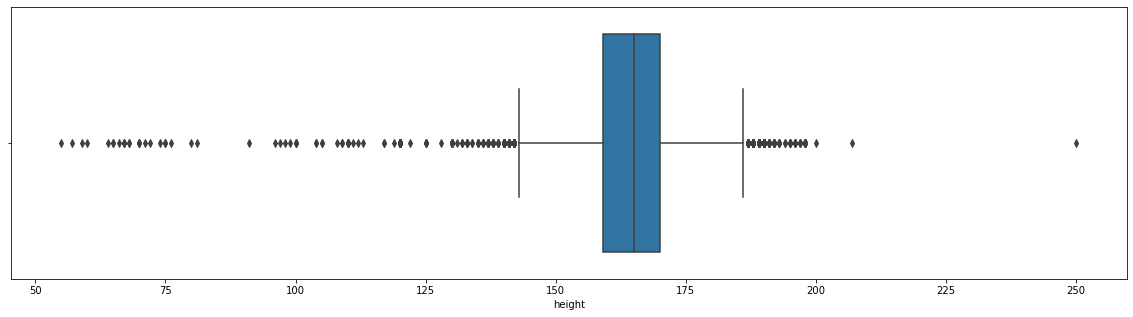

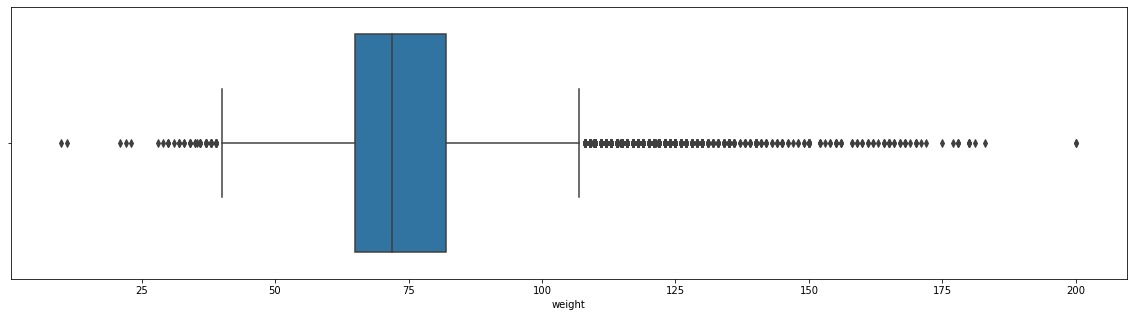

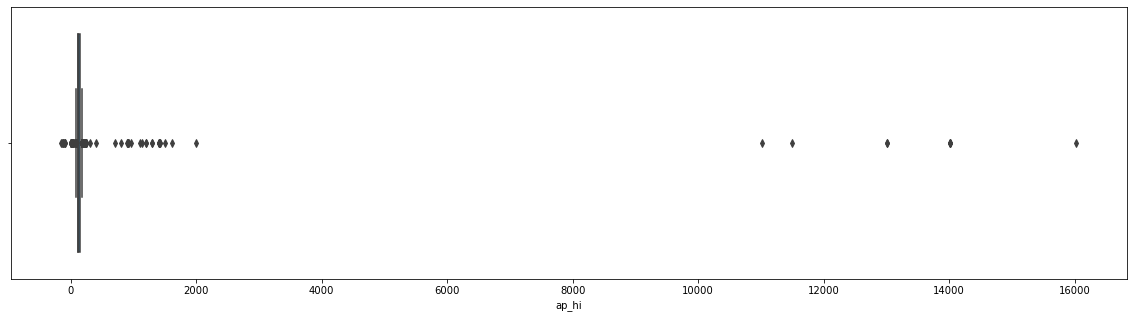

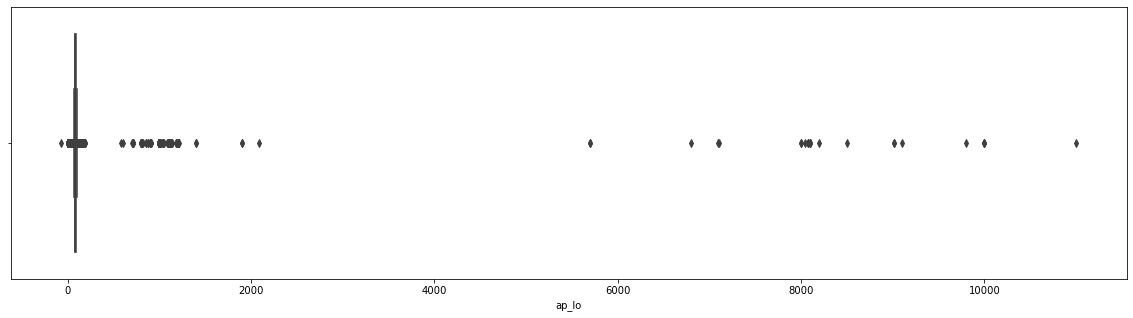

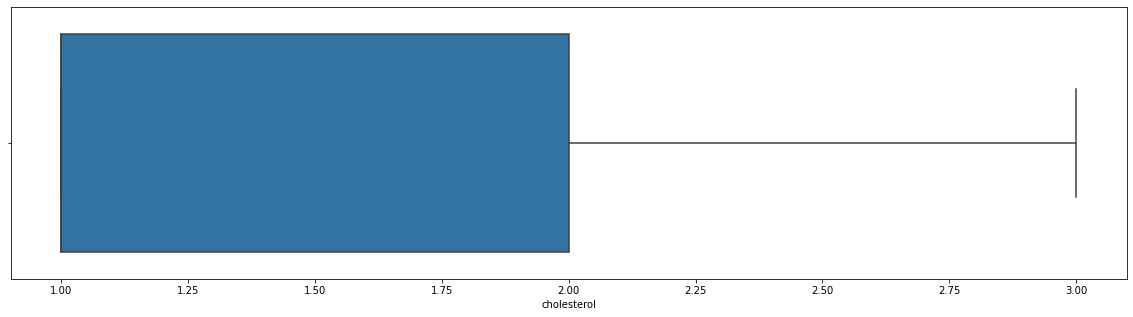

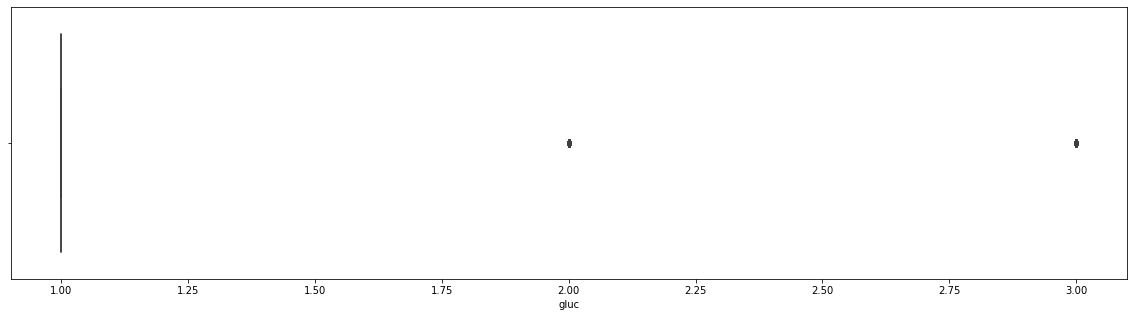

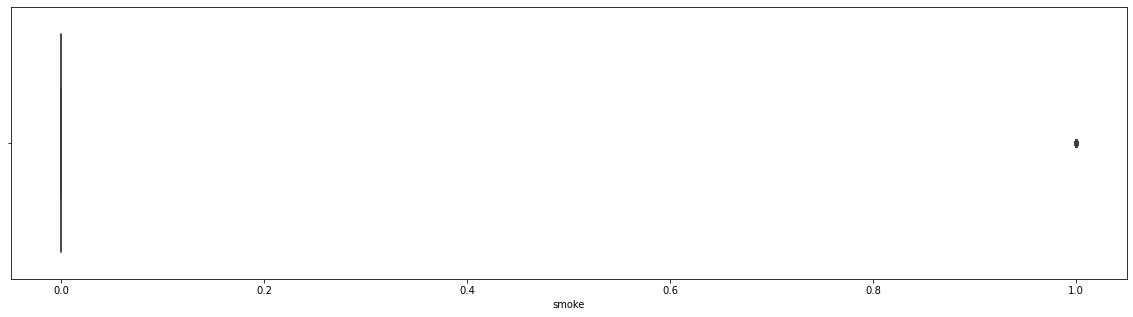

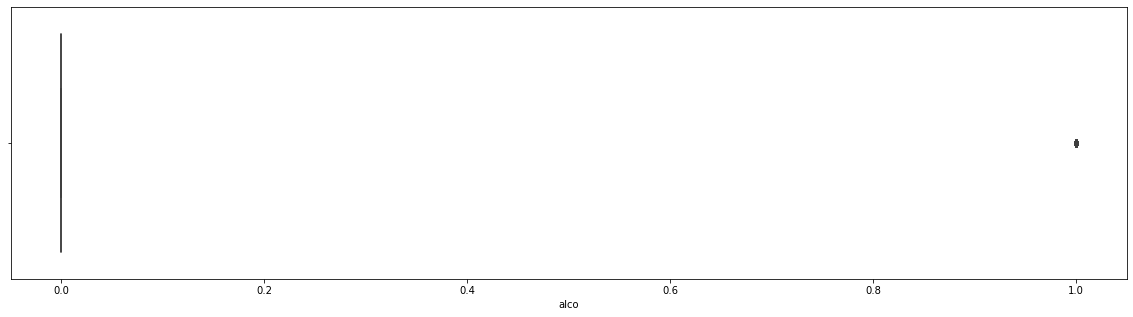

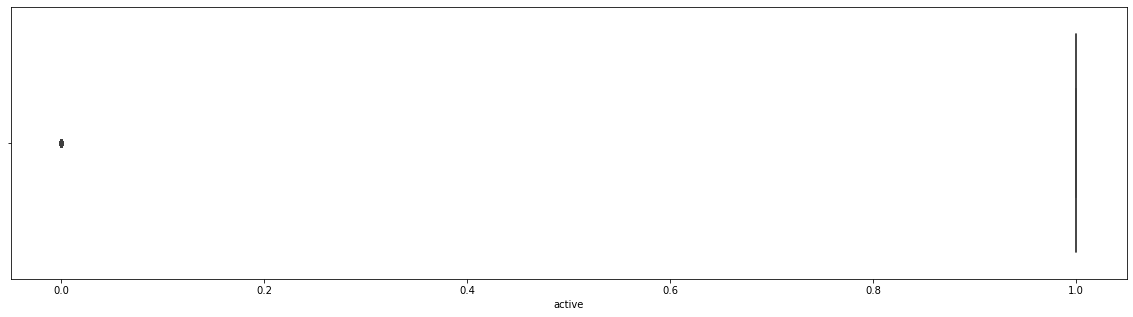

<Figure size 1440x360 with 0 Axes>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data.iloc[:,1:-1]:
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Outlier Detect and Handle Function

In [8]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    #sns.boxplot(coloumn)
    return coloumn

# Handle Outlier

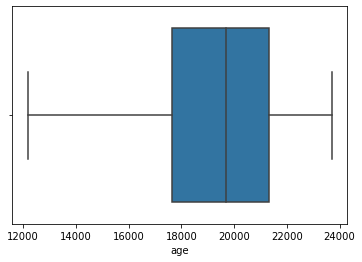

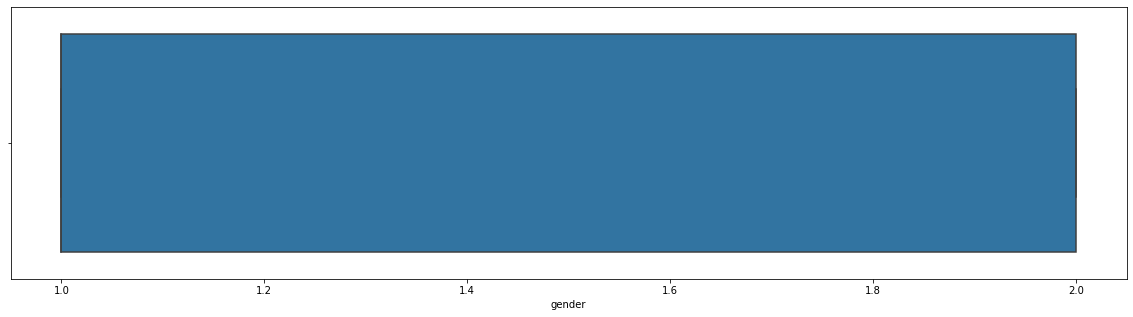

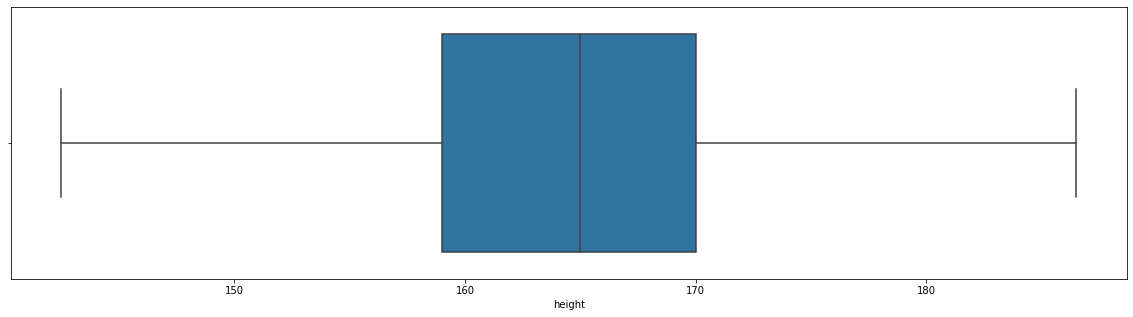

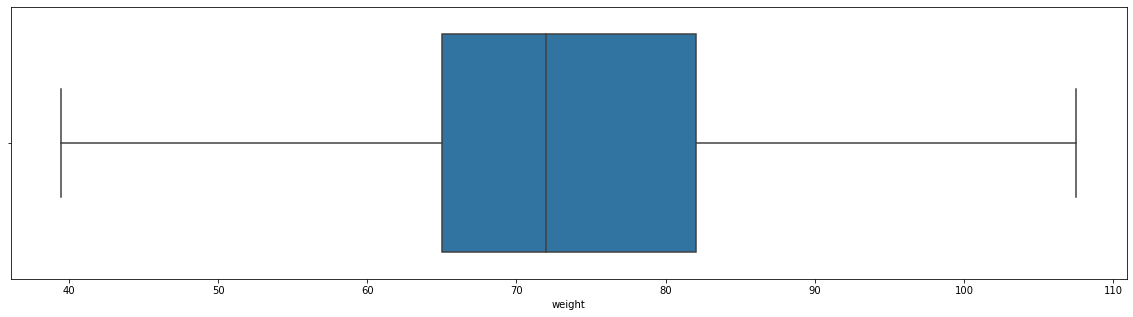

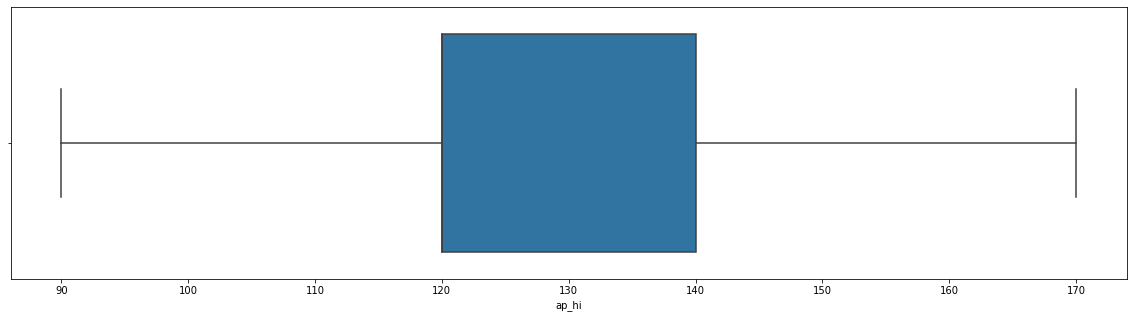

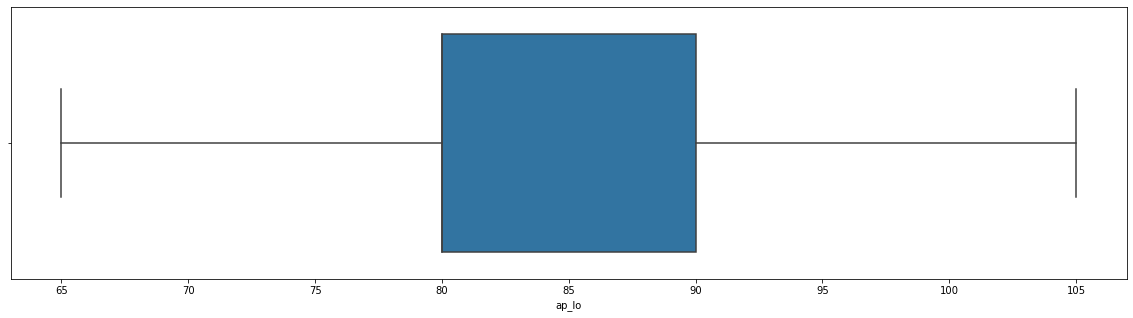

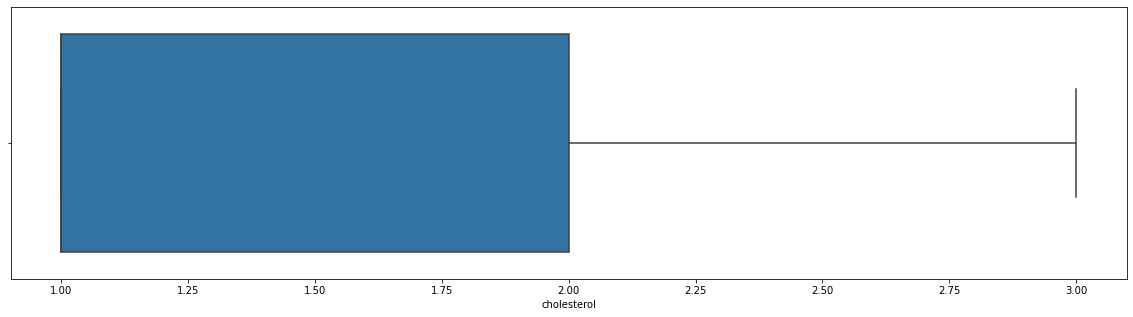

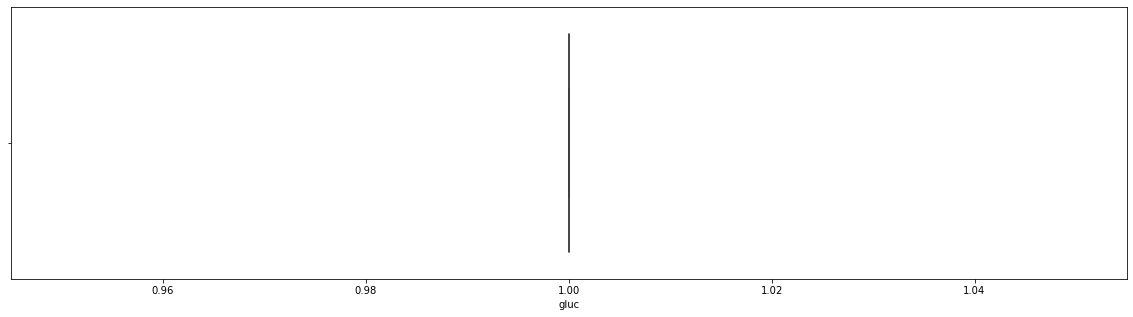

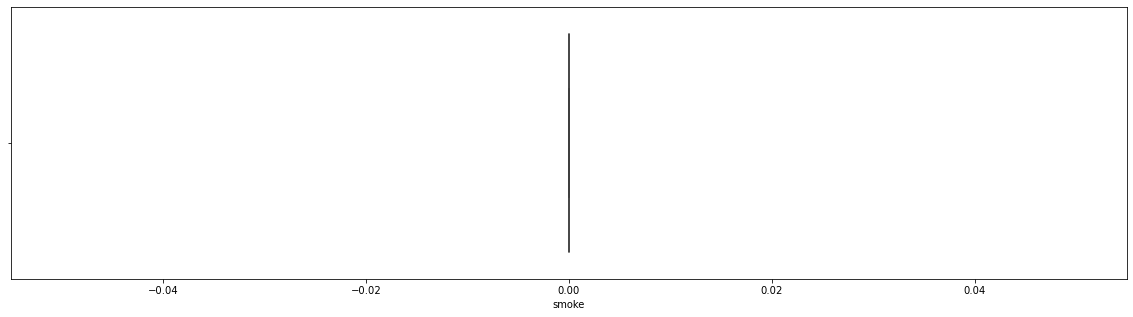

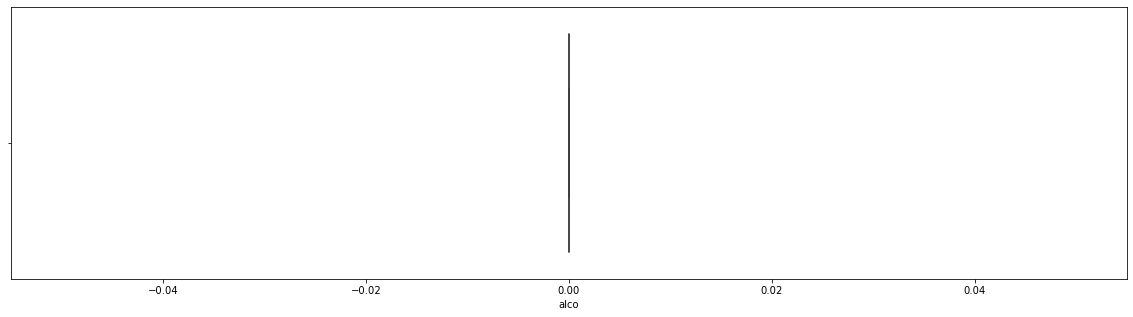

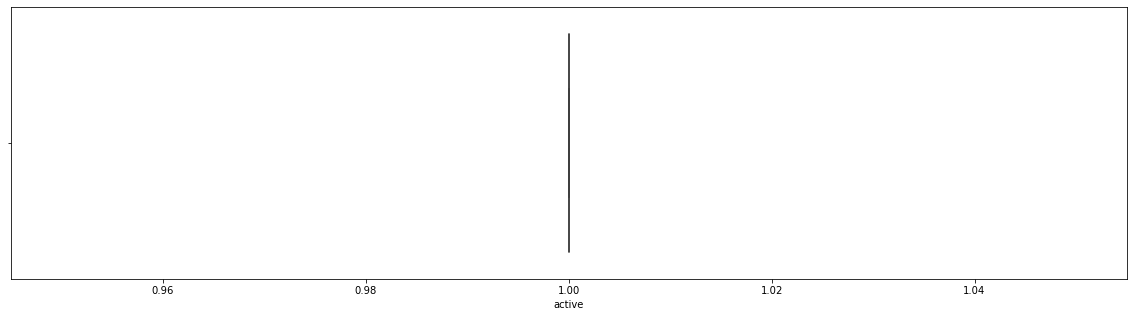

<Figure size 1440x360 with 0 Axes>

In [9]:
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shape of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (56000, 11)
X_test shape: (14000, 11)


In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Define model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
# Fit model on training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1750/1750 [==============================] - 30s 10ms/step - loss: 0.6680 - accuracy: 0.5792
Epoch 2/10
1750/1750 [==============================] - 14s 8ms/step - loss: 0.6485 - accuracy: 0.6184
Epoch 3/10
1750/1750 [==============================] - 14s 8ms/step - loss: 0.6406 - accuracy: 0.6301
Epoch 4/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.6387 - accuracy: 0.6325
Epoch 5/10
1750/1750 [==============================] - 15s 8ms/step - loss: 0.6378 - accuracy: 0.6349
Epoch 6/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.6373 - accuracy: 0.6336
Epoch 7/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.6361 - accuracy: 0.6379
Epoch 8/10
1750/1750 [==============================] - 15s 8ms/step - loss: 0.6358 - accuracy: 0.6366
Epoch 9/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.6354 - accuracy: 0.6377
Epoch 10/10
1750/1750 [==============================] - 16s 9ms/step 

In [59]:
# Evaluate model on test data
score = model.evaluate(X_test, y_test, batch_size=32)
print("Accuracy: ", score[1])

438/438 [==============================] - 5s 5ms/step - loss: 0.6398 - accuracy: 0.6338
Accuracy:  0.6337857246398926
